#Patterns of Protection : Data Understanding and Classfication in Cyber Security



To analyze cybersecurity threat data to identify patterns, trends, and actionable insights that can help improve threat detection, prevention, and response strategies.
*   Detect threats early
*   Understand threat vectors and actors
*   Prioritize mitigation efforts
*   Reduce downtime and financial loss



To understand the Cyber security threats first we need to understand the data and its Shape of the data. In below code we are loading the data and exploring it key area which is very important to understand its nature. In below code we are extracting column name, sample data, missing values, data types. Which is help us to explore data file.

In [ ]:
import pandas as pd

# Load the data file
df = pd.read_csv('/content/Global_Cybersecurity_Threats_2015-2024.csv')

# Basic overview
print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nSample data:\n", df.head())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Data types
print("\nData types:\n", df.dtypes)

# Unique values in key columns
for col in ['Attack Types', 'severity', 'target_system', 'region']:
    if col in df.columns:
        print(f"\nUnique values in '{col}':", df[col].unique())


Shape of dataset: (3000, 10)

Column names: ['Country', 'Year', 'Attack Type', 'Target Industry', 'Financial Loss (in Million $)', 'Number of Affected Users', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used', 'Incident Resolution Time (in Hours)']

Sample data:
    Country  Year        Attack Type     Target Industry  \
0    China  2019           Phishing           Education   
1    China  2019         Ransomware              Retail   
2    India  2017  Man-in-the-Middle                  IT   
3       UK  2024         Ransomware  Telecommunications   
4  Germany  2018  Man-in-the-Middle                  IT   

   Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                          80.53                    773169  Hacker Group   
1                          62.19                    295961  Hacker Group   
2                          38.65                    605895  Hacker Group   
3                          41.44                    65

With help of Descriptive Statistics and above data we can eaisly analysis following area
1.   Summary of numerical columns
2.   Frequency of Attack types
3.   Attack over time



Attack Type
DDoS                 531
Phishing             529
SQL Injection        503
Ransomware           493
Malware              485
Man-in-the-Middle    459
Name: count, dtype: int64


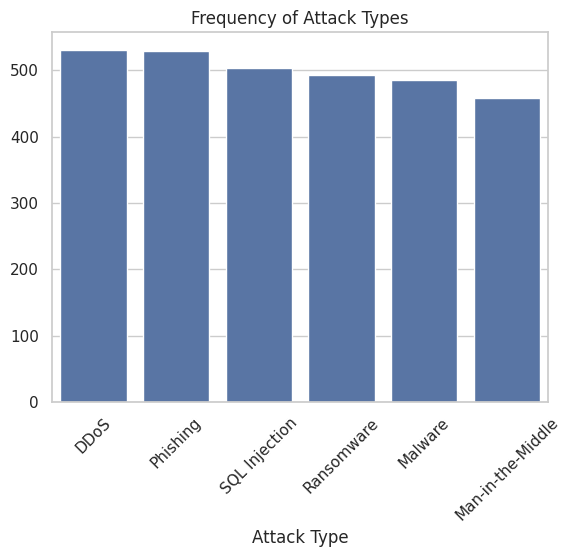

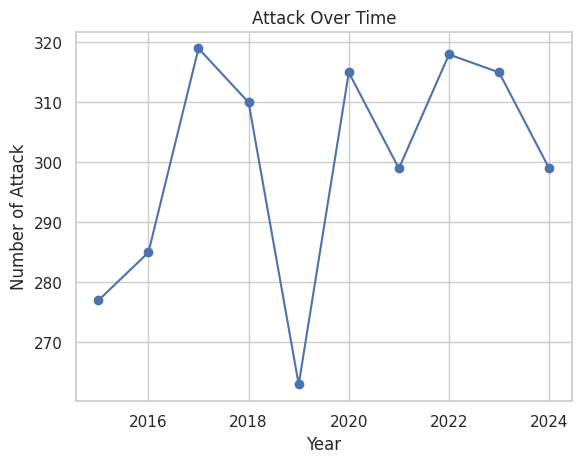

------------------------------------------------------------------
Conclude That.
1. As per above Frequency of Attack Types Bar chart, Its clearly showing that DDOS and Phishing is dominate in different attacks type
2. As per above Attack over the time, frequecy is increasing


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Global_Cybersecurity_Threats_2015-2024.csv')

# Frequency of Attack types
threat_freq = df['Attack Type'].value_counts()
print(threat_freq)

# Threats over time
yearly_trend = df.groupby('Year').size()

# Visualization
sns.barplot(x=threat_freq.index, y=threat_freq.values)
plt.title('Frequency of Attack Types')
plt.xticks(rotation=45)
plt.show()

yearly_trend.plot(kind='line', marker='o', title='Attack Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attack')
plt.grid(True)
plt.show()

print("------------------------------------------------------------------")
print("Conclude That.")
print("1. As per above Frequency of Attack Types Bar chart, Its clearly showing that DDOS and Phishing is dominate in different attacks type")
print("2. As per above Attack over the time, frequecy is increasing")

Predictions and test hypotheses using sample data.

**Estimation: Confidence Interval for Phishing Rate**

In [ ]:
import numpy as np
from scipy.stats import norm

#FInding mean of Phishing rate
phishing_rate = (df['Attack Type'] == 'Phishing').mean()
n = len(df)
z = norm.ppf(0.975)  # 95% confidence

#Confidence Interval
margin_error = z * np.sqrt(phishing_rate * (1 - phishing_rate) / n)
lower = phishing_rate - margin_error
upper = phishing_rate + margin_error

print(f"95% CI for phishing rate: ({lower:.3f}, {upper:.3f})")


95% CI for phishing rate: (0.163, 0.190)


**Hypothesis Testing**
Are this attacks Regionally Biased?

In [ ]:
from scipy.stats import chi2_contingency

country_threats = pd.crosstab(df['Country'], df['Attack Type'])
chi2, p, dof, expected = chi2_contingency(country_threats)

print(f"Chi-square statistic: {chi2:.2f}, p-value: {p:.4f}")


Chi-square statistic: 41.61, p-value: 0.6163


As per above Hypothesis Testing, Its clear below point
1. Null Hypothesis (H₀): Threat types are evenly distributed across regions.

2. Alternative Hypothesis (H₁): Threat types vary significantly by region.

3. Interpretation: If p < 0.05, reject H₀ → regional bias exists.

**Prediction** : Linear Regression for Threat Growth

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df.groupby('Year').size().index.values.reshape(-1, 1)
y = df.groupby('Year').size().values

model = LinearRegression()
model.fit(X, y)

future_years = np.array([[2026], [2027], [2028]])
predictions = model.predict(future_years)

for year, pred in zip(future_years.flatten(), predictions):
    print(f"Predicted threats in {year}: {int(pred)}")


Predicted threats in 2026: 316
Predicted threats in 2027: 319
Predicted threats in 2028: 321


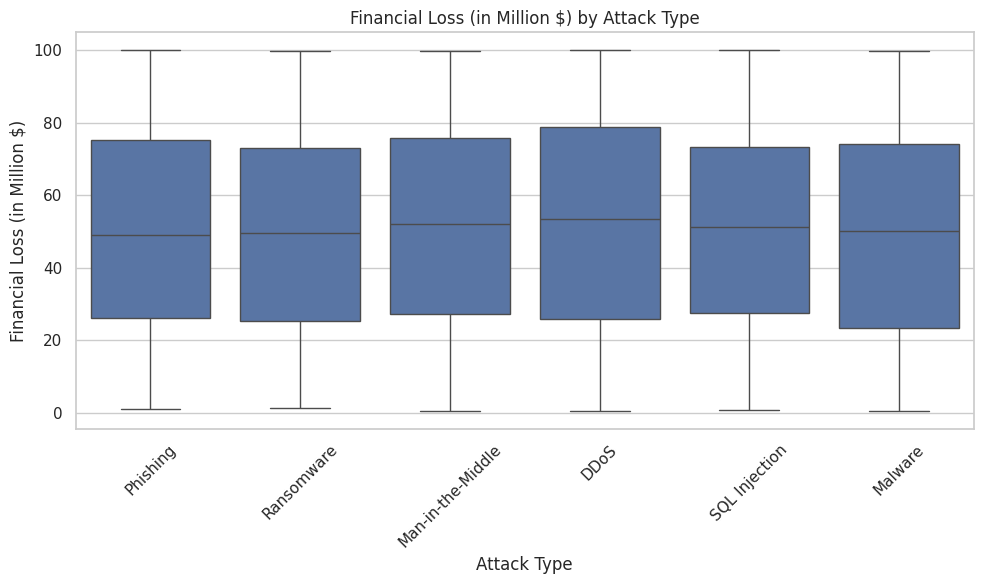

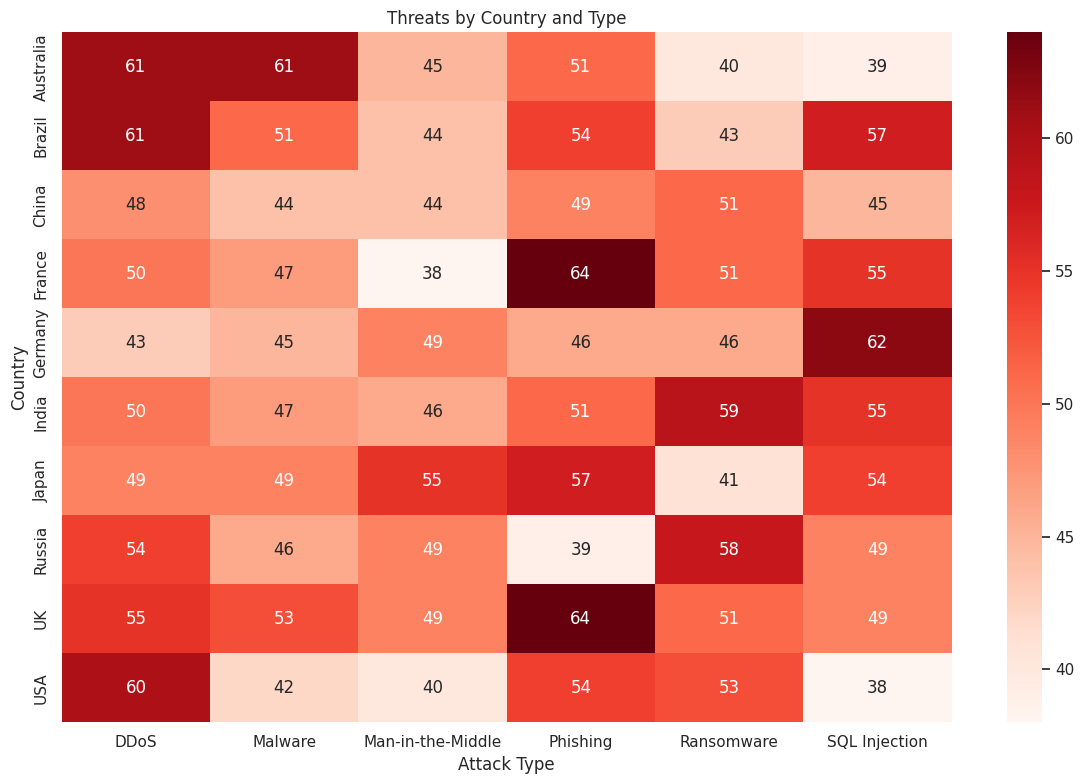

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/content/Global_Cybersecurity_Threats_2015-2024.csv')  # Replace with your actual filename

# Set style
sns.set(style="whitegrid")

# Severity by Threat Type
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Attack Type', y='Financial Loss (in Million $)')
plt.title('Financial Loss (in Million $) by Attack Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Heatmap of Threats by Region and Type
pivot_table = df.pivot_table(index='Country', columns='Attack Type', aggfunc='size', fill_value=0)
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Reds')
plt.title('Threats by Country and Type')
plt.tight_layout()
plt.show()
